# Final project - Computer vision

---

- LIS4042 Visión artificial
- Profesora Zobeida Guzmán
- Otoño 2022
- UDLAP


The original repository for this code is on: https://github.com/mandorc/Vision-artificial-proyecto-final

---

The final project consists of the realization of a system that can extract the old Latin text from images.

For this project, different stages are considered in which preprocessing is carried out, feature extraction, classification, among others, are applied.

During the development of this project, the evaluations of the techniques applied for the development of the application are carried out.

## Contributions of the team

In the following table only the tasks that were used for the final project are shown, however, in this Jupyter Notebook all the implemented tasks are shown.

| Stage | Proposal executed in the final project | Developed by | evaluated or integrated by |
| :---: | :--- | :---: | :---: |
| Preprocessing | Noise reduction using Median Filtering | Armando | Armando |
| Preprocessing | Histogram equalization for contrast enhancement | Armando | Armando |
| Segmentation | Thresholding for image segmentation | Armando | Armando |
| Feature Extraction | Feature extraction using ORB | Armando | Armando |

## Requeriments

To be able to execute all the libraries used within this Notebook, it is necessary to guarantee that all the following libraries are installed, for this it is enough to execute the following code block:

In [ ]:
pip install opencv-python
pip install matplotlib

## Preprocessing

It is important that before carrying out an analysis of the images that we have in our dataset, we carry out an image improvement process.

To carry out the image improvement we can implement different filters, depending on the characteristics of each of the images.

The filters proposed for it are the following:

### Median filtering

Median filters are particularly effective in the presence of impulse noise.

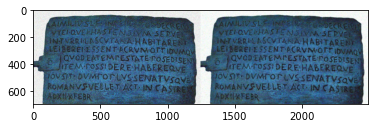

In [64]:
# import Opencv
import cv2
# import matplotlib for plotting
from matplotlib import pyplot as plt
# import numpy for working with vectors
import numpy as np

# Read the image from the assets folder
img = cv2.imread('assets/image-with-noise.jpg')
# Apply the median filter included on the opencv library
median = cv2.medianBlur(img, 5)

# type object representing the type of array scalars of uint16 dtype
median = median.astype(np.uint16)
# We save the image into the assets folder
cv2.imwrite("assets/image_without_noise.jpg", median)

images = np.concatenate((img, median), axis=1)

# We show the images on the notebook
plt.imshow(images)

### Histogram equalization for contrast enhancement

Histogram equalization is a technique used to improve contrast in images by effectively spreading out the most requent values.

A normalized histogram is given by equation:

$$p(r_k) =  \frac{n_k}{MN}, \thinspace for \thinspace k=0,1,2,...,L-1$$

Where:
- $MN$ is the total number of pixels in the image.
- $N_k$ is the number of pixels that have intensity $r_k$

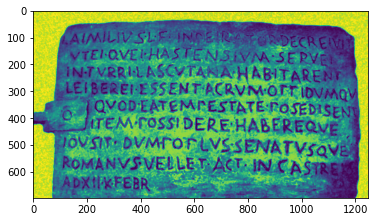

In [35]:
# import Opencv
import cv2
  
# import Numpy
import numpy as np
  
# We load the image from the assets folder
img = cv2.imread('assets/image_without_noise.jpg', 0)
  
# creating a Histograms Equalization of an image
equ = cv2.equalizeHist(img)

# type object representing the type of array scalars of uint16 dtype
equ = equ.astype(np.uint16)
# We save the image into the assets folder
cv2.imwrite("assets/image_without_noise_contrast.jpg", equ)

# We show the images on the notebook
plt.imshow(equ)

## Segmentation using Thresholding

It is considered on the simplest method for image segmentation where this method can create binary images.

One way to extract the objects from the background is to select a threshold (T).

One limitation is that thresholding will work with low level of noise.

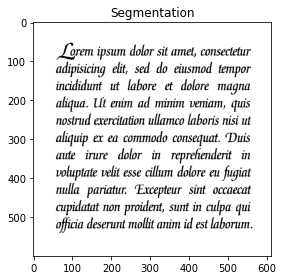

In [63]:
# import opencv
import cv2
# import Numpy
import numpy as np
import matplotlib.pyplot as plt
 
# Load a clean image from the dataset
img = cv2.imread('assets/latin-clean-sample.png')
# Convert the image to gray scale
gray_img = rgb2gray(img)
 

# Iterating with the threshold
binarized_gray = (gray_img > 9*0.1)*1
   
# Setting a title for the plotting
plt.title("Segmentation")
   
# Displaying the binarized image
plt.imshow(binarized_gray, cmap = 'gray')
plt.tight_layout()

## Feature Extraction

ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance.

ORB’s main contributions are as follows:
- The addition of a fast and accurate orientation component to FAST
- The efficient computation of oriented BRIEF features
- Analysis of variance and correlation of oriented BRIEF features
- A learning method for decorrelating BRIEF features under rotational invariance, leading to better performance in nearest-neighbor applications

Source: https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf

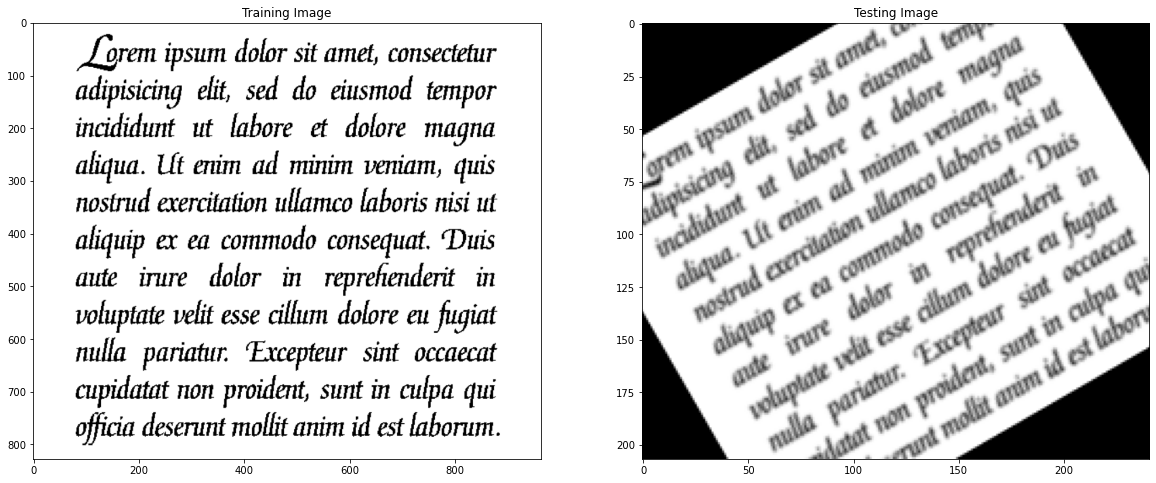

In [65]:
# Import the libraries we need
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image from our dataset
image1 = cv2.imread('assets/latin-clean-sample-segmentation.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  418


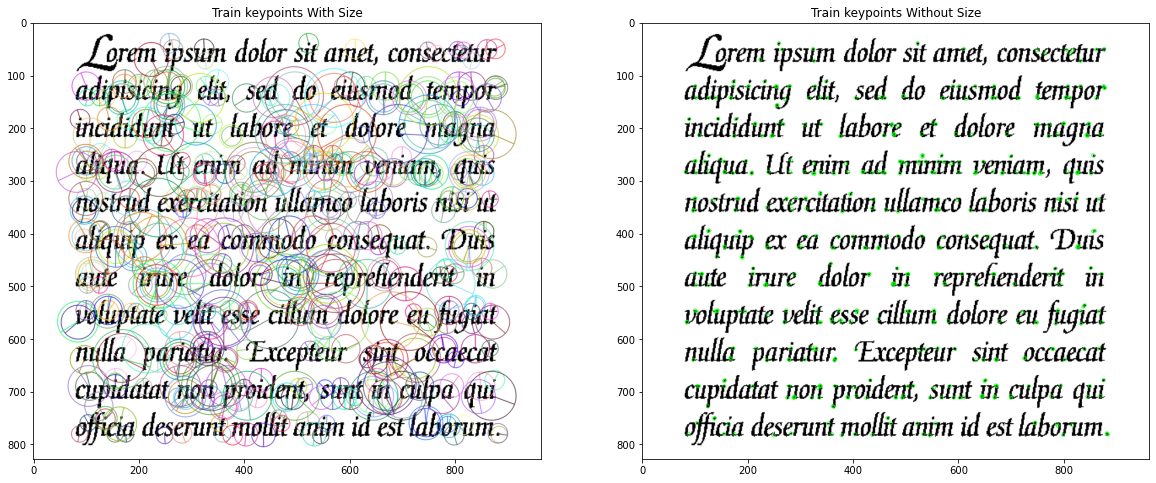

In [67]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

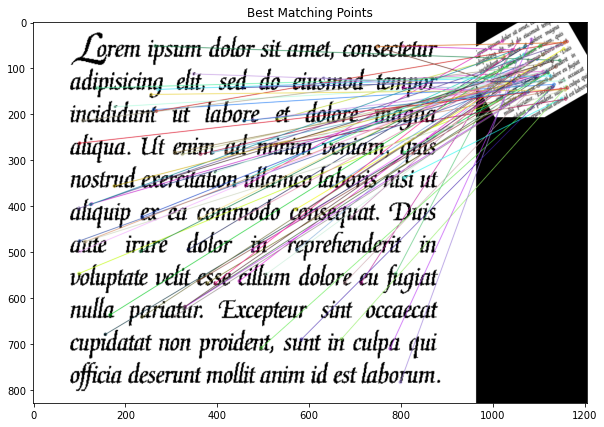


Number of Matching Keypoints Between The Training and Query Images:  76


In [68]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))